In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from tqdm import tqdm
from time import time

# TODO: Move functions to separate modules
import functions as f

import core.background_model as background_model
import core.clique_finding as cf
import core.stats 

# GLOBALS

TTN_BIN = 4275
BIN_MAP_PATH = 'mappings/bin_map_human_100000.bed'
GTF_PATH = 'mappings/gencode.v38.annotation.gtf'
GENE_BIN_PATH = 'mappings/gene_bins.txt'
NON_GENE_BIN_PATH = 'mappings/non_gene_bins.txt'


gene_bins = []
with open('mappings/gene_bins.txt', 'r') as file:
    for line in file:
        gene_bins.append(line.strip())
gene_bins = [int(x) for x in gene_bins]


non_gene_bins = []
with open('mappings/non_gene_bins.txt', 'r') as file:
    for line in file:
        non_gene_bins.append(line.strip())
non_gene_bins = [int(x) for x in non_gene_bins]



## Analytical

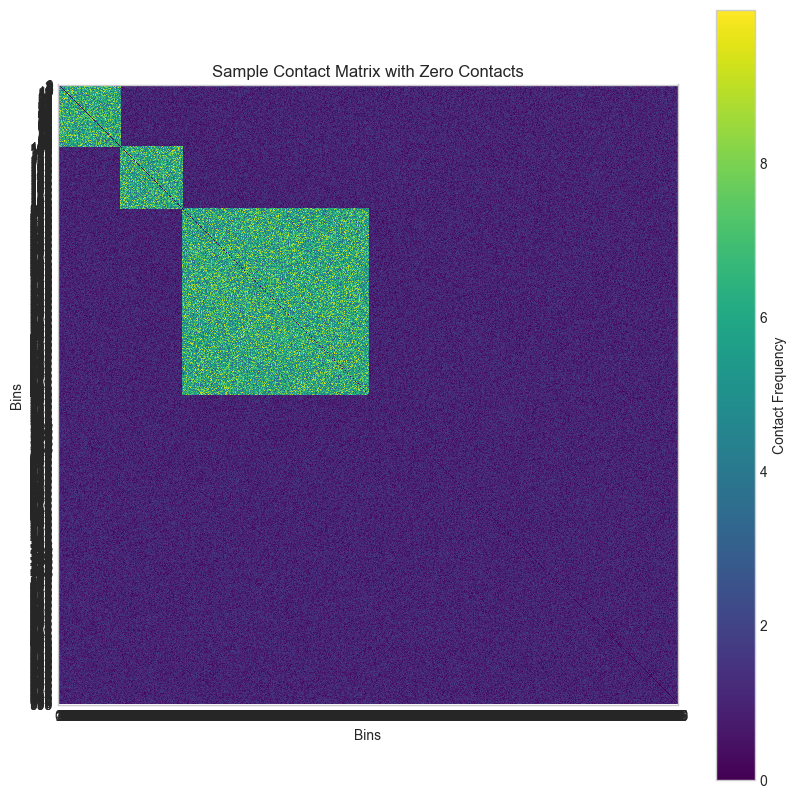

<Figure size 640x480 with 0 Axes>

In [204]:
contact_matrix_zero = f.generate_sample_matrix_bins(1000)


plt.figure(figsize=(10, 10))
plt.imshow(contact_matrix_zero, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Contact Frequency')
plt.title('Sample Contact Matrix with Zero Contacts')
plt.xlabel('Bins')
plt.ylabel('Bins')
plt.xticks(ticks=np.arange(len(contact_matrix_zero)), labels=np.arange(len(contact_matrix_zero)))
plt.yticks(ticks=np.arange(len(contact_matrix_zero)), labels=np.arange(len(contact_matrix_zero)))
plt.grid(False)
plt.show()
plt.tight_layout()


In [205]:
SEED_BIN = 17

In [210]:
import core.optimizer


sizes, ttn_scores, p_values, fold_changes, bg_dists = core.optimizer.optimize_clique_size_diffusion(contact_matrix_zero, 60, 17, 0.25)

🔄 Computing full analytical diffusion matrix F…
✔︎ TTN seed clique (size 60) ready
✔︎ Built background cliques for all 1000 seeds


Processing sizes: 100%|██████████| 60/60 [00:06<00:00,  8.80it/s] 

✅ Done optimize_clique_size_analytical


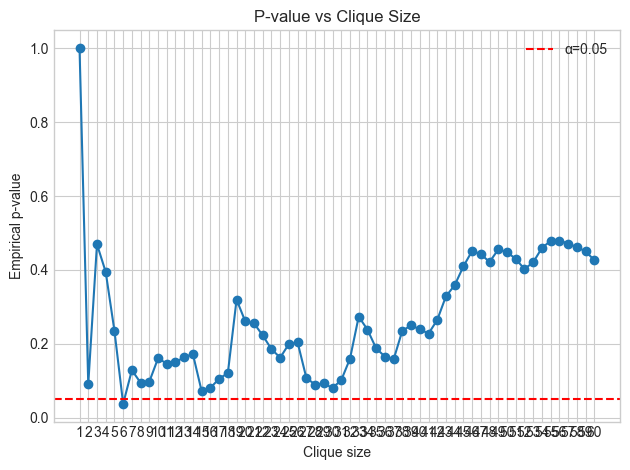

Optimal clique size = 6, p-value = 0.0380


In [211]:
import core.visuals

core.visuals.plot_clique_size_optimization(sizes, p_values)


In [208]:
sizes, ttn_scores, p_values, folds, bg = core.optimizer.optimize_clique_size(
    contact_matrix_zero,
    max_clique_size=60,
    seed_bin=SEED_BIN,
    num_samples=1000,
)

Starting optimize_clique_size: max_clique_size=60, seed_bin=17, num_samples=1000, alg=find_greedy_clique
Computed TTN full clique of size 60 using find_greedy_clique


Sampling background cliques: 100%|██████████| 1000/1000 [00:02<00:00, 495.73it/s]


Background sampling complete.


Processing sizes: 100%|██████████| 60/60 [00:04<00:00, 12.98it/s] 

Completed optimize_clique_size


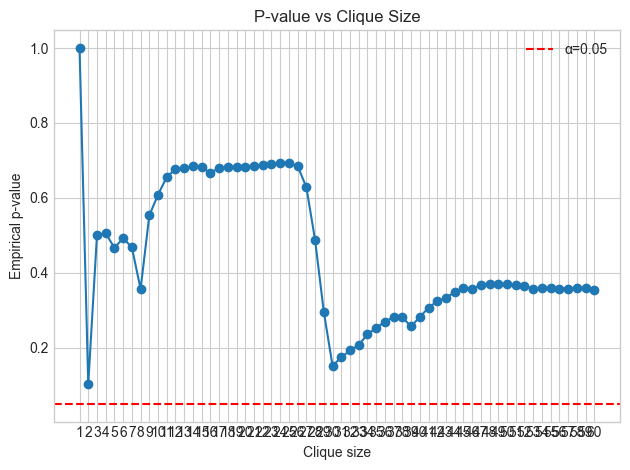

Optimal clique size = 2, p-value = 0.1029


In [209]:
import core.visuals

core.visuals.plot_clique_size_optimization(sizes, p_values)


🔄 Starting full sweep over alphas and sizes...
→ Running optimize_clique_size for α=0.01
🔄 Computing full analytical diffusion matrix F…
✔︎ TTN seed clique (size 50) ready
✔︎ Built background cliques for all 100 seeds


Processing sizes: 100%|██████████| 50/50 [00:00<00:00, 99.27it/s] 


✅ Done optimize_clique_size_analytical
   • Completed α=0.01 (collected sizes 1–50)
→ Running optimize_clique_size for α=0.05
🔄 Computing full analytical diffusion matrix F…
✔︎ TTN seed clique (size 50) ready
✔︎ Built background cliques for all 100 seeds


Processing sizes: 100%|██████████| 50/50 [00:00<00:00, 101.66it/s]


✅ Done optimize_clique_size_analytical
   • Completed α=0.05 (collected sizes 1–50)
→ Running optimize_clique_size for α=0.1
🔄 Computing full analytical diffusion matrix F…
✔︎ TTN seed clique (size 50) ready
✔︎ Built background cliques for all 100 seeds


Processing sizes: 100%|██████████| 50/50 [00:00<00:00, 104.32it/s]


✅ Done optimize_clique_size_analytical
   • Completed α=0.1 (collected sizes 1–50)
→ Running optimize_clique_size for α=0.25
🔄 Computing full analytical diffusion matrix F…
✔︎ TTN seed clique (size 50) ready
✔︎ Built background cliques for all 100 seeds


Processing sizes: 100%|██████████| 50/50 [00:00<00:00, 101.29it/s]


✅ Done optimize_clique_size_analytical
   • Completed α=0.25 (collected sizes 1–50)
→ Running optimize_clique_size for α=0.5
🔄 Computing full analytical diffusion matrix F…
✔︎ TTN seed clique (size 50) ready
✔︎ Built background cliques for all 100 seeds


Processing sizes: 100%|██████████| 50/50 [00:00<00:00, 101.63it/s]

✅ Done optimize_clique_size_analytical
   • Completed α=0.5 (collected sizes 1–50)
✅ DataFrame assembled: 250 rows
📊 Plotting heatmaps...
Most significant combination:
α = 0.050, k = 38, p-value = 2.97e-02
log₁₀(p-value) = -1.527



/Users/ethan/Desktop/chromatin-heart-dev/core/optimizer.py:240: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
/Users/ethan/Desktop/chromatin-heart-dev/core/optimizer.py:240: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
/opt/anaconda3/envs/expanse38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/expanse38/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


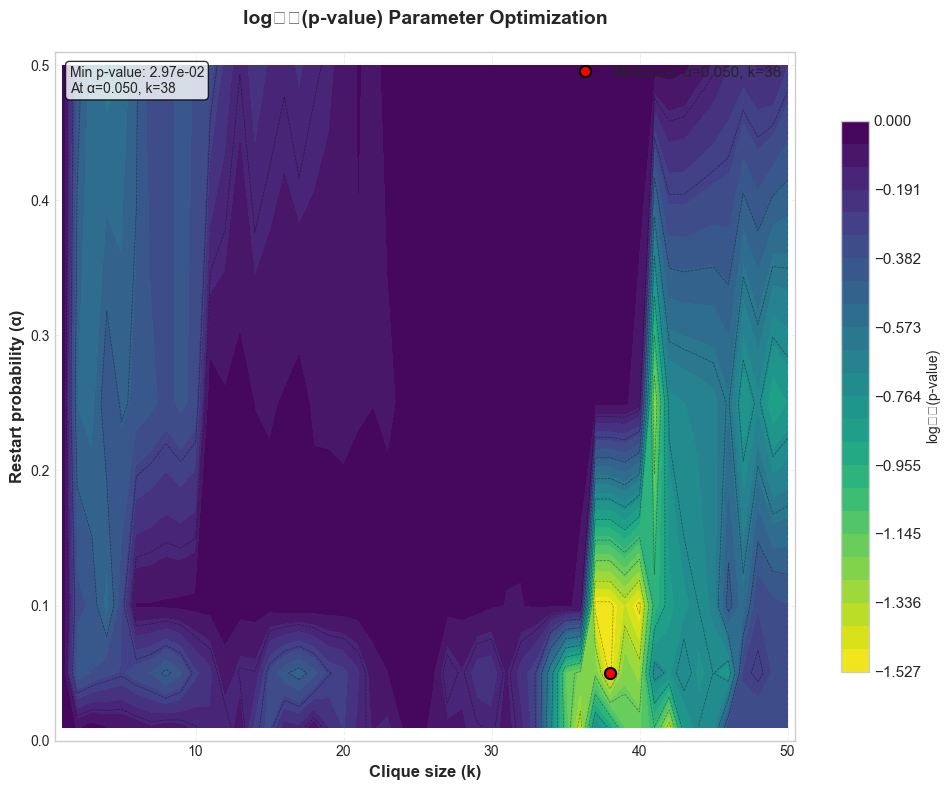

🎉 All done!
💾 CSV files saved


In [196]:
import core.optimizer


core.optimizer.grid_search_diffusion_params(contact_matrix_zero, SEED_BIN, [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.99], 50, save_suffix='test')


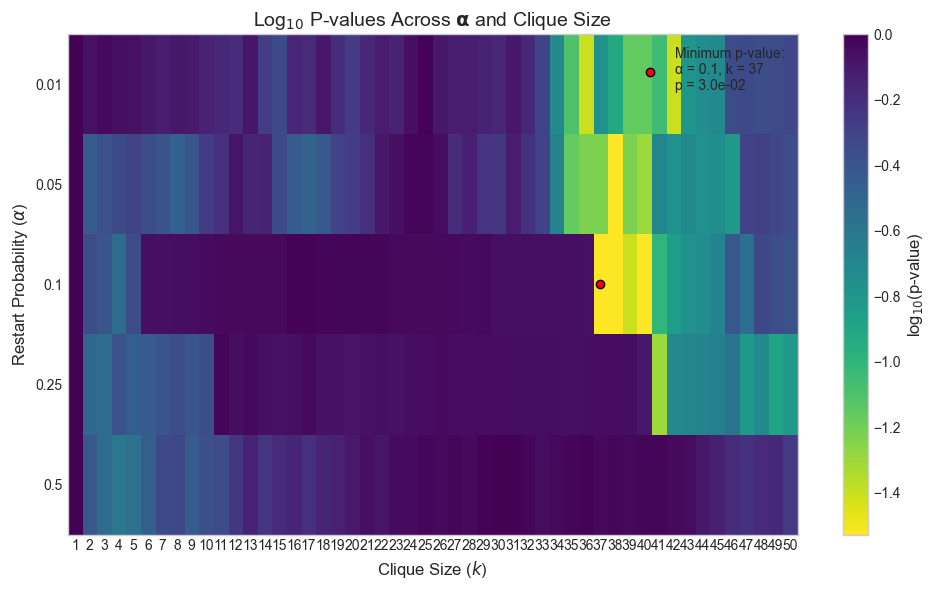

In [197]:
core.visuals.plot_pval_heatmap("pval_matrix_test.csv")

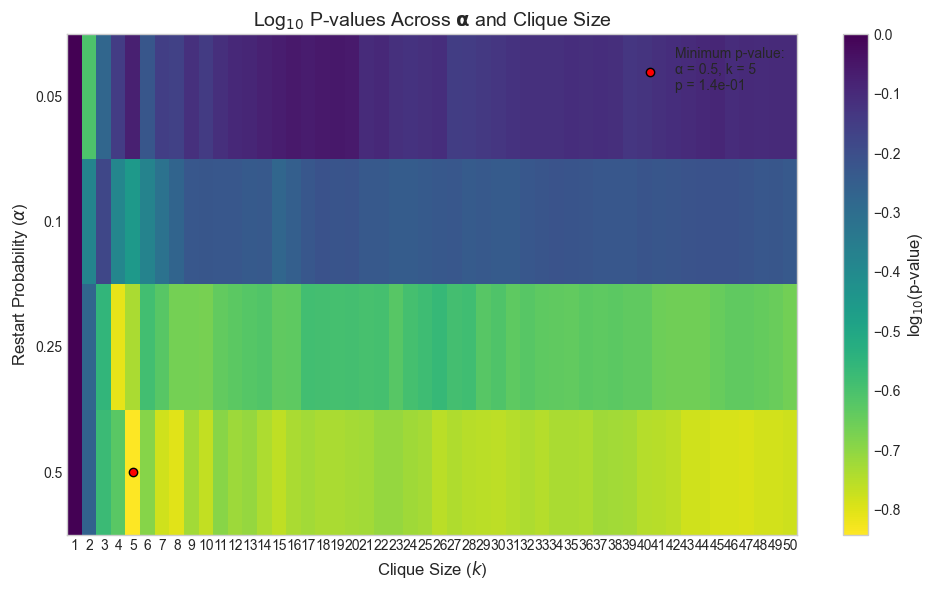

In [191]:
core.visuals.plot_pval_heatmap("pval_matrix3.csv")

## Monte Carlo

In [ ]:
neighbors, cdfs = build_walk_index(contact_matrix_zero) 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Parameters ---
alphas          = [0.05, 0.1, 0.25, 0.5]
max_clique_size = 25
num_samples     = 10000

print("🔄 Starting full sweep over alphas and sizes...")

# --- Collect all size-wise results ---
records = []
for alpha in alphas:
    print(f"→ Running optimize_clique_size for α={alpha}")
    sizes, scores, pvals, folds, _ = optimize_clique_size(
        contact_matrix=contact_matrix_zero,
        max_clique_size=max_clique_size,
        seed_bin=TTN_BIN,
        num_samples=num_samples,
        clique_alg=cf.random_walk,
        alpha=alpha,
        neighbors=neighbors,
        cdfs=cdfs,
        num_molecules=3000
    )
    print(f"   • Completed α={alpha} (collected sizes 1–{max_clique_size})")
    for size, pval, fold in zip(sizes, pvals, folds):
        records.append({
            'alpha': alpha,
            'size':  size,
            'pval':  pval,
            'fold':  fold
        })

df = pd.DataFrame(records)
print(f"✅ DataFrame assembled: {df.shape[0]} rows")

# --- Pivot into matrices ---
pval_mat = df.pivot(index='alpha', columns='size', values='pval')
fold_mat = df.pivot(index='alpha', columns='size', values='fold')

print("📊 Plotting heatmaps...")

# 1) p-value heatmap (log10 scale)
plt.figure(figsize=(6,4))
plt.title('Empirical p-value (log10) across α and clique size')
plt.imshow(np.log10(pval_mat), aspect='auto', origin='lower',
           extent=[1-0.5, max_clique_size+0.5, min(alphas), max(alphas)])
plt.colorbar(label='log10(p-value)')
plt.xlabel('Clique size (k)')
plt.ylabel('Restart prob (α)')
plt.xticks(range(1, max_clique_size+1, 2))
plt.yticks(alphas)
plt.tight_layout()

# 2) Fold-change heatmap
plt.figure(figsize=(6,4))
plt.title('Fold-change (TTN / median bg) across α and clique size')
plt.imshow(fold_mat, aspect='auto', origin='lower',
           extent=[1-0.5, max_clique_size+0.5, min(alphas), max(alphas)])
plt.colorbar(label='fold-change')
plt.xlabel('Clique size (k)')
plt.ylabel('Restart prob (α)')
plt.xticks(range(1, max_clique_size+1, 2))
plt.yticks(alphas)
plt.tight_layout()

plt.show()
print("📈 Heatmaps rendered")

# --- Print best combos ---
best_p = df.loc[df['pval'].idxmin()]
best_f = df.loc[df['fold'].idxmax()]
print(f"🏆 Best by p-value    → α={best_p.alpha}, size={best_p.size}, p-value={best_p.pval:.4g}")
print(f"🥇 Best by fold-change → α={best_f.alpha}, size={best_f.size}, fold-change={best_f.fold:.4g}")

print("🎉 All done!")

In [ ]:
# Save main DataFrame
df.to_csv("sweep_result_noY.csv", index=False)

# Save pivoted matrices
pval_mat.to_csv("pval_matrix_noY.csv")
fold_mat.to_csv("fold_matrix_noY.csv")

print("💾 CSV files saved")